In [2]:
import tensorflow as tf
from tensorflow import keras



In [21]:
import pandas as pd
import seaborn as sns
import sklearn as sk
from tensorflow.keras import layers




In [28]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [43]:
finance = pd.read_csv("finance_numeric.csv")
finance = finance.dropna()
finance_features= finance.drop("Price",axis = 1)
finance_label = finance["Price"]
feature_train,feature_test,label_train,label_test = train_test_split(finance_features,finance_label,test_size= 7,random_state=8)
finance.describe().transpose()[["mean","std"]]
first = np.array(feature_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalize(first).numpy())
  


First example: [[1.22e+01 6.39e-01 1.21e+01 1.04e+10 1.26e+09 4.59e+00 2.89e+00 1.21e+00
  8.31e-01]]

Normalized: [[-0.3  -0.82  1.48 -0.43 -0.34  0.18 -0.13  0.01 -0.01]]


In [45]:
#Normalization Layer
normalize = tf.keras.layers.Normalization(axis = -1)
normalize.adapt(np.array(feature_train))
print(normalize.mean.numpy())
linear_model_finance= tf.keras.Sequential([
    normalize,
    layers.Dense(units=1)

])
linear_model_finance.predict(feature_train[:10])
linear_model_finance.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=.1),
    loss = "mean_squared_error"
)

history = linear_model_finance.fit(
    feature_train,
    label_train,
    epochs =100,
    verbose = 0, 
    validation_split = .2)





[[2.4590635e+01 1.9065925e+00 3.8302255e+00 4.9792545e+10 3.5979169e+09
  3.9775636e+00 1.4654816e+01 1.2103494e+00 8.3215725e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


NameError: name 'test_results' is not defined

In [48]:
test_results = {}
test_results["linear_model_finance"]= linear_model_finance.evaluate(feature_test, label_test,verbose = 0)
print(test_results)

{'linear_model_finance': 1687.463623046875}


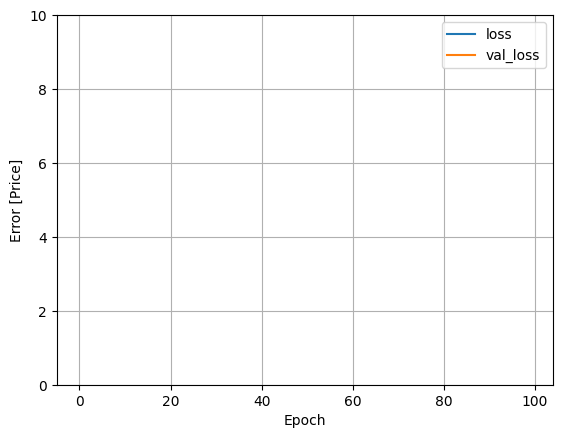

In [50]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)
plot_loss(history)


In [52]:

def finance_DNN_compile(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64,activation="relu"),
        layers.Dense(64,activation="relu"),
        layers.Dense(1)


    ])
    model.compile(loss = "mean_squared_error", optimizer= tf.keras.optimizers.Adam(0.001))
    return model





In [57]:
finance_DNN = finance_DNN_compile(normalize)
history = finance_DNN.fit(
    feature_train,
    label_train, 
    validation_split = .2,
    verbose = 0, epochs = 100
)
test_results["dnn_model"]= finance_DNN.evaluate(feature_test,label_test, verbose = 0)
print(test_results)


{'linear_model_finance': 1687.463623046875, 'dnn_model': 1221.109130859375}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


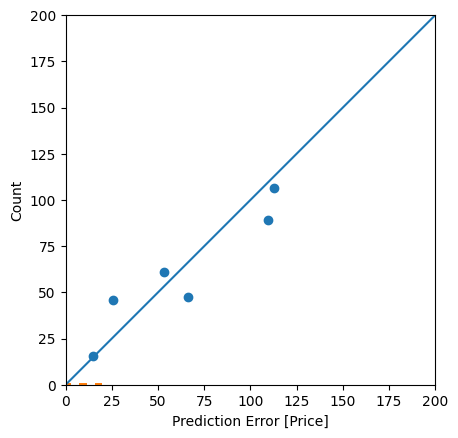

In [61]:
finance_test_pred = finance_DNN.predict(feature_test).flatten()
a = plt.axes(aspect = "equal")
plt.scatter(label_test, finance_test_pred)
plt.xlabel("True Values[Price]")
plt.ylabel("Predictions[Price]")
lims = [0,200]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims)



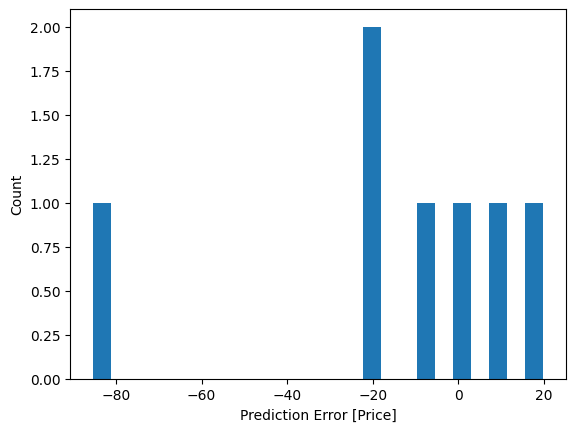

In [62]:
error = finance_test_pred - label_test
plt.hist(error,bins = 25)
plt.xlabel("Prediction Error [Price]")
_=plt.ylabel("Count")